In [43]:
import pandas as pd
import numpy as np
import os

def load_data(file_path):
    file_names = os.listdir(file_path)
    
    for filename in file_names:
        if filename.endswith('.csv'):
            data = pd.read_csv(os.path.join(file_path, filename))
            yield data, filename
            print(f"Loaded data from {filename}")

raw_data_path = "csv_datasets"
processed_data_path = "processed_datasets"
os.makedirs(processed_data_path, exist_ok=True)
fig_output_dir = "figures"
os.makedirs(fig_output_dir, exist_ok=True)

output_file = "combined_data.csv"
if os.path.exists(output_file):
    print(f"Output file {output_file} already exists. Loading data...")
    df = pd.read_csv(output_file)
else:
    print(f"Output file {output_file} does not exist. Creating a new one.")
    data_generator = load_data(raw_data_path)
    df = pd.DataFrame()
    try:
        for data, filename in data_generator:
            data['filename'] = filename  # Add filename as a new column
            df = pd.concat([df, data], ignore_index=True)

        output_file = "combined_data.csv"
        df.to_csv(output_file, index=False)
        print(f"Combined data saved to {output_file}")
    except FileNotFoundError as e:
        print(e)

    # Save the combined DataFrame to a new CSV file
    

Output file combined_data.csv already exists. Loading data...


In [44]:
# Total entries in the combined DataFrame
total_entries = len(df)
print(f"Total entries in the combined DataFrame: {total_entries}")

# cleanup the smiles strings (some have multiple smiles strings in a single entry, ignoring the second entry)
df['SMILES'] = df['SMILES'].apply(lambda x: x.split(';')[0] if str(x).find(';') != -1 else x)
df['Canonical SMILES'] = df['Canonical SMILES'].apply(lambda x: x.split(';')[0] if str(x).find(';') != -1 else x)

# Display the first few rows of the combined DataFrame
print("First few rows of the combined DataFrame:")
display(df.head())

Total entries in the combined DataFrame: 3837
First few rows of the combined DataFrame:


,Name,Empirical formula,CAS,SMILES,Canonical SMILES,"Mw, g*mol-1","CC50/IC50/EC50, mM","Statistics (95% CI, SEM, SD, RMSE, SE etc.)","Incubation time, h",Cell line,Method,Reference (author+year+journal),doi,Notes,filename,"Mw,g*mol-1",Mw. g*mol-1
0,"((3-hydroxypyridine-1-ium-2,6-diyl)bis(methyle...",C31H26Cl3NOP2S6,2043361-99-3,OC1=CC=C(C[P+](C2=CC=CS2)(C3=CC=CS3)C4=CC=CS4)...,Oc1ccc(C[P+](c2cccs2)(c2cccs2)c2cccs2)[nH+]c1C...,789.264,0.2655,NaN,72,MCF-7,MTT,"Shtyrlin, 2016, Russ. Chem. Bull.",10.1007/s11172-016-1334-y,NaN,polycharged.csv,NaN,NaN
1,"((3-hydroxypyridine-1-ium-2,6-diyl)bis(methyle...",C31H62Cl3NOP2,2043361-95-9,OC1=CC=C(C[P+](CCCC)(CCCC)CCCC)[NH+]=C1C[P+](C...,CCCC[P+](CCCC)(CCCC)Cc1ccc(O)c(C[P+](CCCC)(CCC...,633.15,1.241,NaN,72,MCF-7,MTT,"Shtyrlin, 2016, Russ. Chem. Bull.",10.1007/s11172-016-1334-y,NaN,polycharged.csv,NaN,NaN
2,"((3-hydroxypyridine-1-ium-2,6-diyl)bis(methyle...",C43H38Cl3NOP2,2043361-93-7,OC1=CC=C(C[P+](C2=CC=CC=C2)(C3=CC=CC=C3)C4=CC=...,Oc1ccc(C[P+](c2ccccc2)(c2ccccc2)c2ccccc2)[nH+]...,753.09,0.0255,NaN,72,MCF-7,MTT,"Shtyrlin, 2016, Russ. Chem. Bull.",10.1007/s11172-016-1334-y,NaN,polycharged.csv,NaN,NaN
3,"((3-hydroxypyridine-1-ium-2,6-diyl)bis(methyle...",C49H50Cl3NOP2,2043361-97-1,OC1=CC=C(C[P+](C2=CC=C(C)C=C2)(C3=CC=C(C)C=C3)...,Cc1ccc([P+](Cc2ccc(O)c(C[P+](c3ccc(C)cc3)(c3cc...,837.252,>0.030,NaN,6,OVCAR-4,MTT,"Iksanova, 2018, Anticancer Drugs",10.1097/CAD.0000000000000642,NaN,polycharged.csv,NaN,NaN
4,"((3-hydroxypyridine-1-ium-2,6-diyl)bis(methyle...",C49H50Cl3NOP2,2043361-97-1,OC1=CC=C(C[P+](C2=CC=C(C)C=C2)(C3=CC=C(C)C=C3)...,Cc1ccc([P+](Cc2ccc(O)c(C[P+](c3ccc(C)cc3)(c3cc...,837.252,>0.030,NaN,24,OVCAR-4,MTT,"Iksanova, 2018, Anticancer Drugs",10.1097/CAD.0000000000000642,NaN,polycharged.csv,NaN,NaN


In [45]:
# cleaning up the cytotoxicity data
for index, row in df.iterrows():
    ct_data = row.get("CC50/IC50/EC50, mM")
    
    try:
        # check if the value has inequality signs or other characters
        ct_value = str(ct_data).strip()
        if ct_value.startswith("<") or ct_value.startswith(">"):
            ct_value = ct_value[1:].strip()  # Remove leading < or >
        if ct_value.startswith("~"):
            ct_value = ct_value[1:].strip()
        ct_value = float(ct_value)
        df.at[index, "CC50/IC50/EC50, mM"] = ct_value
    except Exception as e:
        raise ValueError(f"Error processing row {index}: {e}")


In [46]:
# calculate the ECFP/Morgan fingerprints for each row 
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator

ecfps = []
for index, row in df.iterrows():
    smiles = row.get('Canonical SMILES')
    if smiles:
        try:
            mol = Chem.MolFromSmiles(smiles)
            if mol is not None:
                fp = rdFingerprintGenerator.GetMorganGenerator(radius=3).GetCountFingerprintAsNumPy(mol)
                ecfps.append(fp)
            else:
                # Invalid SMILES, append zero vector
                ecfps.append(np.zeros(2048, dtype=np.uint32))
        except Exception as e:
            print(f"Error processing SMILES '{smiles}' at index {index}: {e}")
            ecfps.append(np.zeros(2048, dtype=np.uint32))
    else:
        # Missing SMILES, append zero vector
        ecfps.append(np.zeros(2048, dtype=np.uint32))

ecfp_df = pd.DataFrame(ecfps, columns=[f'ECFP_{i}' for i in range(2048)])
ecfp_df.to_csv("processed_datasets/ecfp_fingerprints.csv", index=False)
# add the smiles column and cytotoxicity values to the ECFP DataFrame
ecfp_df['SMILES'] = df['Canonical SMILES'].values
ecfp_df['CC50/IC50/EC50, mM'] = df['CC50/IC50/EC50, mM'].values
ecfp_df['filename'] = df['filename'].values

print("ECFP fingerprints saved to processed_datasets/ecfp_fingerprints.csv")


KeyboardInterrupt: 

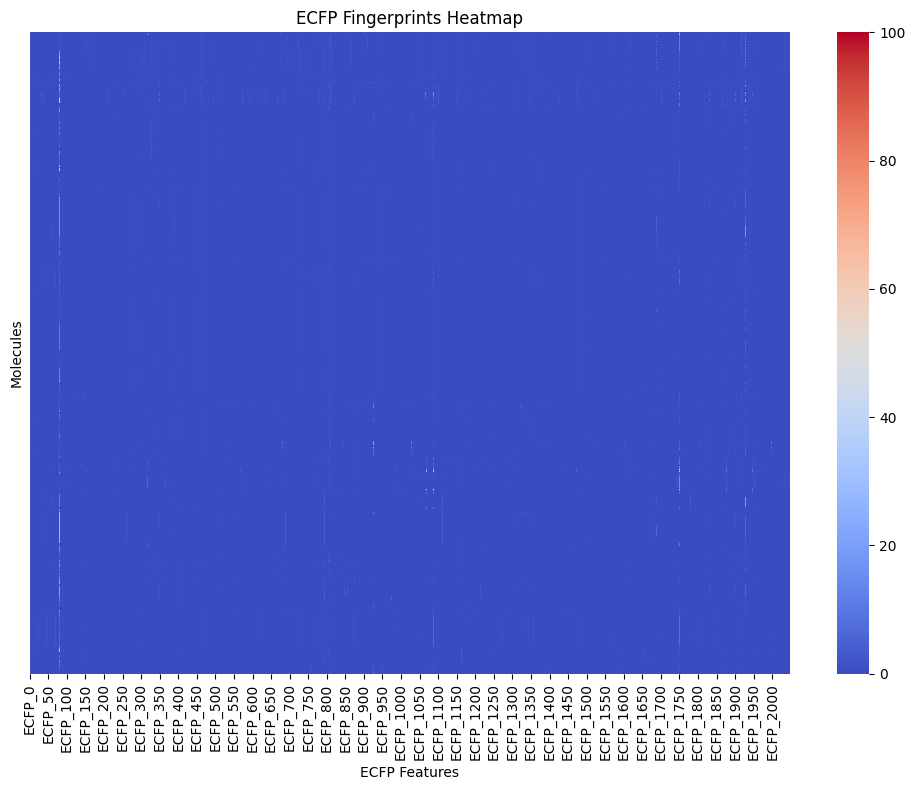

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualize the ecfp values as a heatmap
ecfp_data = ecfp_df.iloc[:, :-3]  # Exclude the non-fingerprint columns

plt.figure(figsize=(10, 8))
sns.heatmap(ecfp_data, cmap='coolwarm', cbar=True, xticklabels=50, yticklabels=False)
plt.title("ECFP Fingerprints Heatmap")
plt.xlabel("ECFP Features")
plt.ylabel("Molecules")

plt.tight_layout()
plt.show()



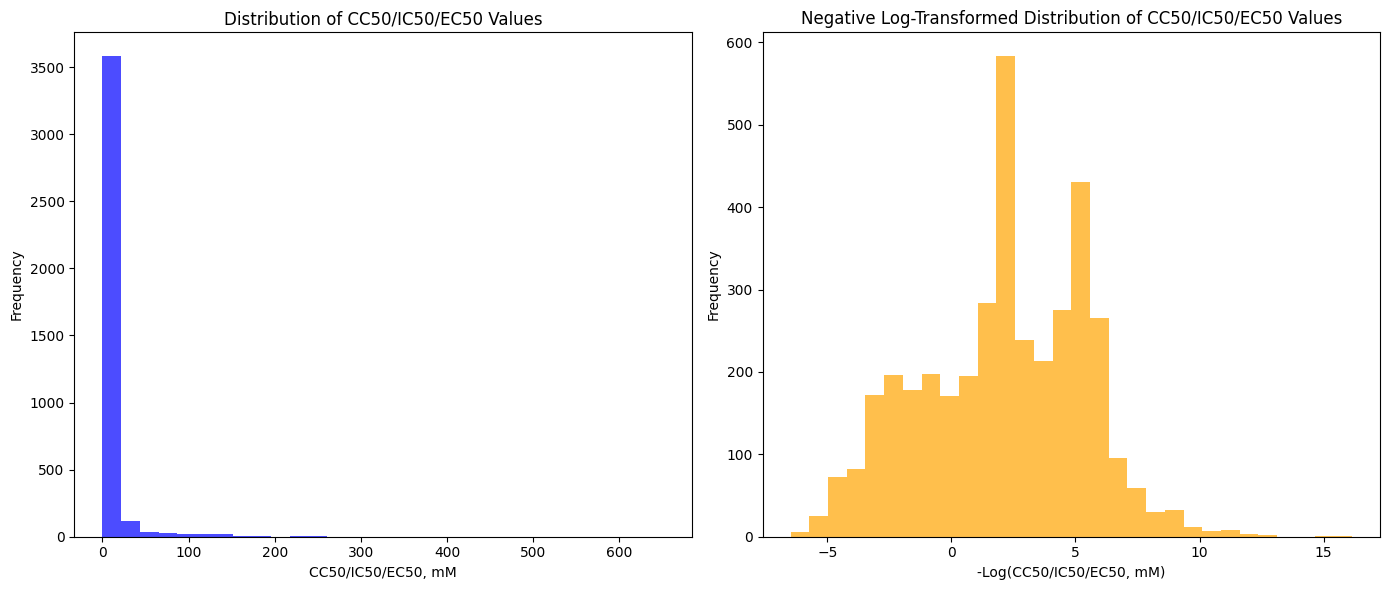

In [ ]:
# Looking at the distribution of CC50/IC50/EC50 values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(df['CC50/IC50/EC50, mM'], bins=30, color='blue', alpha=0.7)
plt.title("Distribution of CC50/IC50/EC50 Values")
plt.xlabel("CC50/IC50/EC50, mM")
plt.ylabel("Frequency")
plt.tight_layout()

# log transform the CC50/IC50/EC50 values
log_ct = df['CC50/IC50/EC50, mM'].apply(lambda x: -np.log(x) if x > 0 else np.nan)
# visualize the log-transformed values
plt.subplot(1, 2, 2)
plt.hist(log_ct, bins=30, color='orange', alpha=0.7)
plt.title("Negative Log-Transformed Distribution of CC50/IC50/EC50 Values")
plt.xlabel("-Log(CC50/IC50/EC50, mM)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("figures/cc50_ic50_ec50_distribution.png", dpi=300)
plt.show()


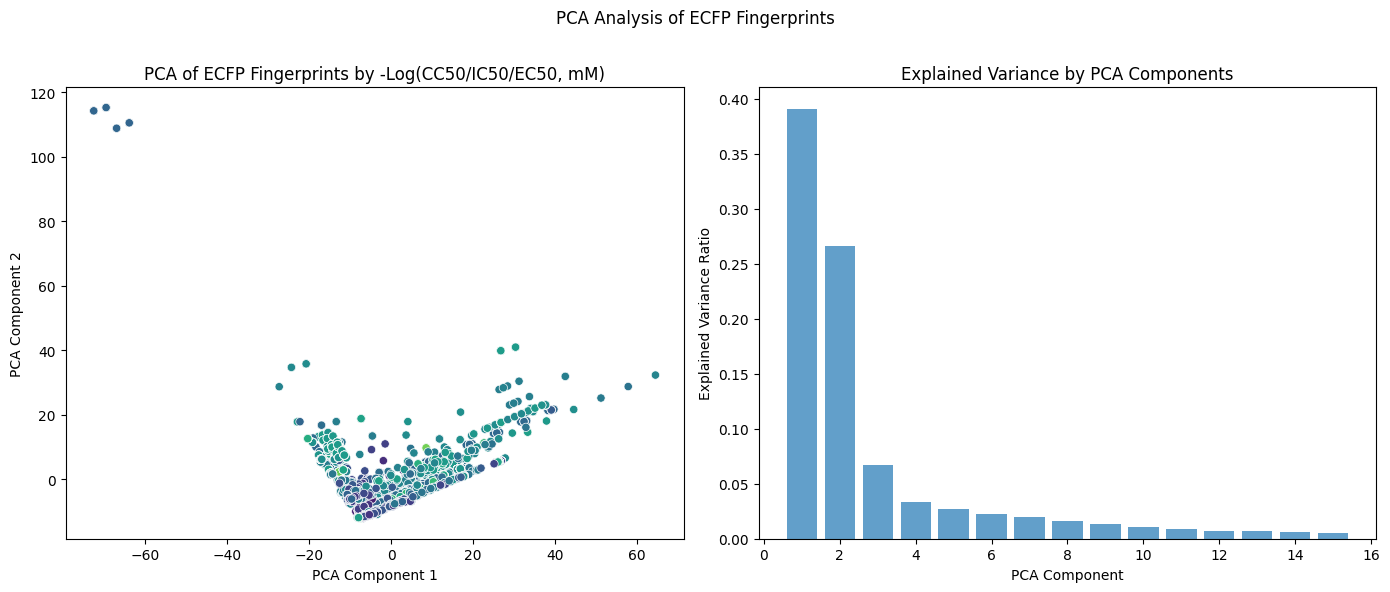

In [ ]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca_result = pca.fit_transform(ecfp_data)

pca_df = pd.DataFrame(data=pca_result[:, :2], columns=['PCA1', 'PCA2'])
pca_df['ct'] = df['CC50/IC50/EC50, mM'].values
log_ct = pd.DataFrame(df['CC50/IC50/EC50, mM'].apply(lambda x: -np.log10(x) if x > 0 else np.nan))
pca_df['log_ct'] = log_ct

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='log_ct', data=pca_df, palette='viridis', legend=None)
# ignore legend for now
plt.title("PCA of ECFP Fingerprints by -Log(CC50/IC50/EC50, mM)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.tight_layout()

plt.subplot(1, 2, 2)
explained_variance = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.title("Explained Variance by PCA Components")
plt.xlabel("PCA Component")
plt.ylabel("Explained Variance Ratio")
plt.tight_layout()
plt.suptitle("PCA Analysis of ECFP Fingerprints")
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig("figures/pca_ecfp_analysis.png", dpi=300)
plt.show()

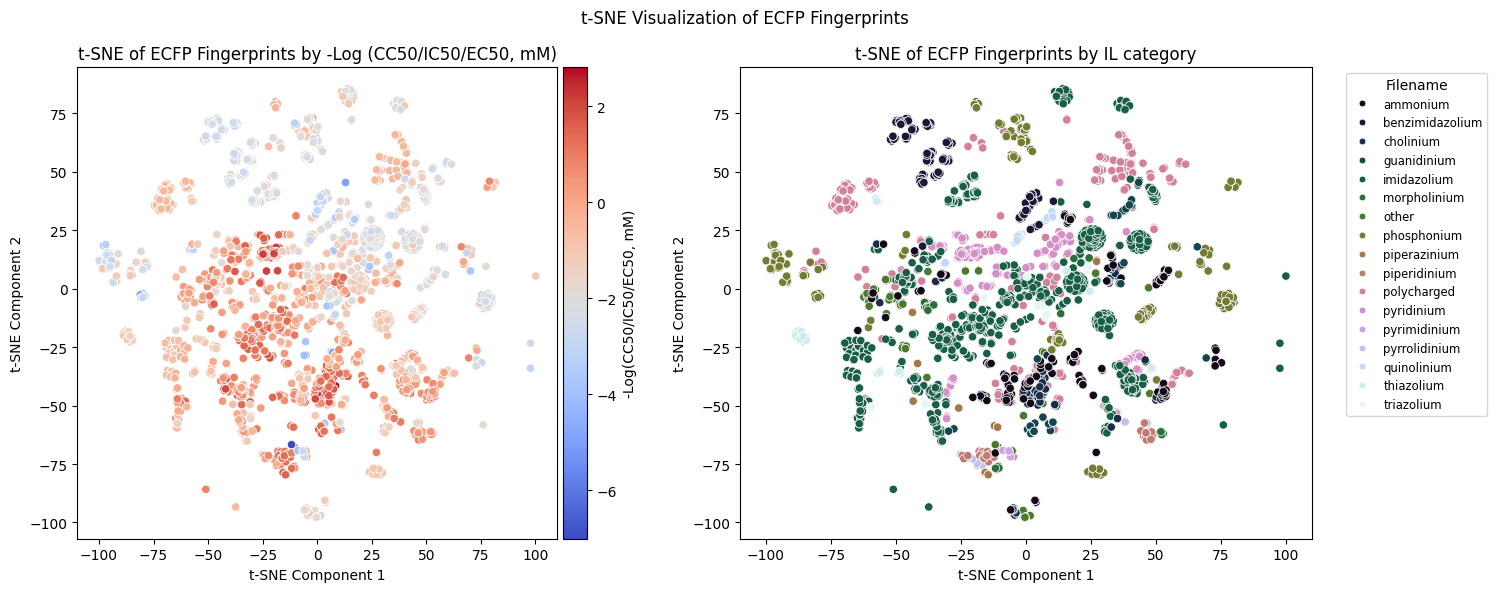

In [ ]:
# using t-SNE for visualization
from sklearn.manifold import TSNE
from matplotlib.cm import ScalarMappable
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(ecfp_data)
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])
tsne_df['ct'] = df['CC50/IC50/EC50, mM'].values
tsne_df['filename'] = df['filename'].values
tsne_df['filename'] = tsne_df['filename'].apply(lambda x: x.split('.')[0])  # remove file extension for better visualization
tsne_df['filename'] = tsne_df['filename'].astype('category')

log_ct = pd.DataFrame(df['CC50/IC50/EC50, mM'].apply(lambda x: np.log10(x) if x > 0 else np.nan))
tsne_df['log_ct'] = log_ct
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sc = sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='log_ct', data=tsne_df, palette='coolwarm', legend=None)
norm = plt.Normalize(tsne_df['log_ct'].min(), tsne_df['log_ct'].max())
sm = ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.01)
cbar.set_label('-Log(CC50/IC50/EC50, mM)')
plt.title("t-SNE of ECFP Fingerprints by -Log (CC50/IC50/EC50, mM)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.subplot(1, 2, 2)
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='filename', data=tsne_df, palette='cubehelix')
plt.title("t-SNE of ECFP Fingerprints by IL category")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', markerscale=0.8)
plt.subplots_adjust(right=0.75)  # Adjust the right margin to fit the legend
plt.suptitle("t-SNE Visualization of ECFP Fingerprints")
plt.tight_layout()
plt.savefig("figures/tsne_ecfp_visualization.png", dpi=300)
plt.show()

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


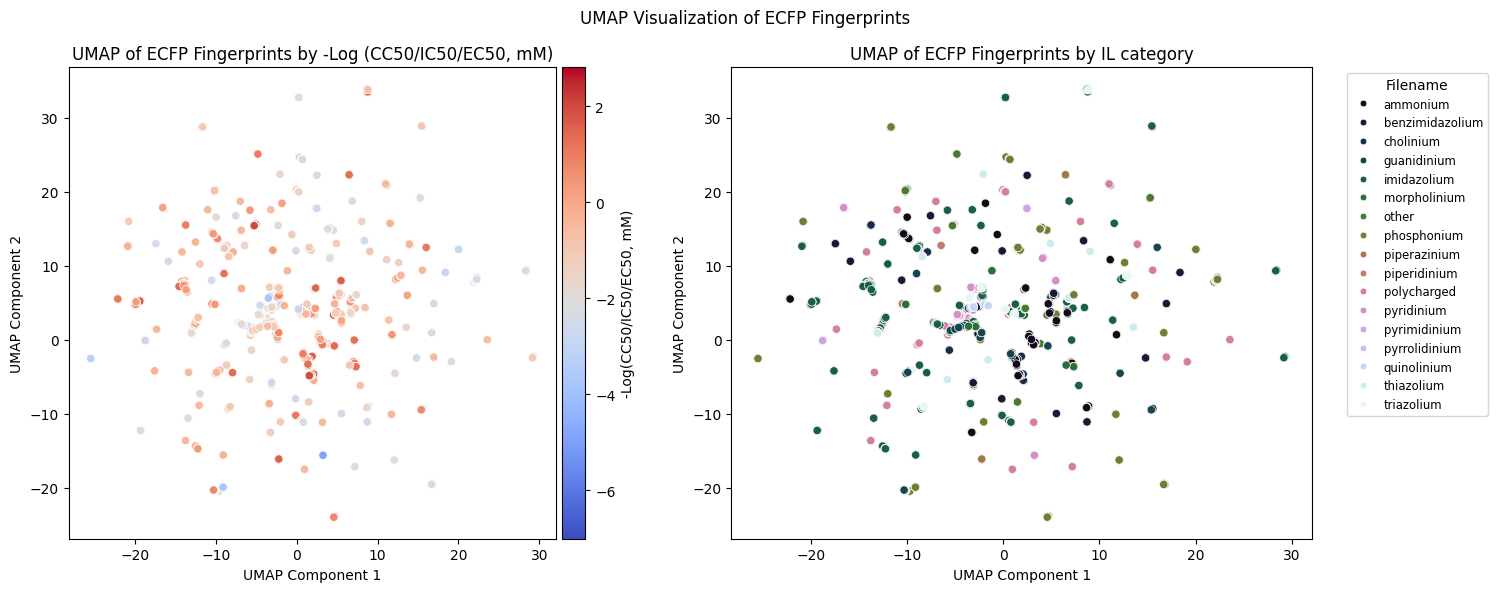

In [ ]:
# using UMAP for visualization
from umap import UMAP
umap = UMAP(n_components=2, random_state=42, n_jobs=-1)
umap_result = umap.fit_transform(ecfp_data)
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
umap_df['ct'] = df['CC50/IC50/EC50, mM'].values
log_ct = pd.DataFrame(df['CC50/IC50/EC50, mM'].apply(lambda x: np.log10(x) if x > 0 else np.nan))
umap_df['log_ct'] = log_ct
umap_df['filename'] = df['filename'].values
umap_df['filename'] = umap_df['filename'].apply(lambda x: x.split('.')[0])  # remove file extension for better visualization
umap_df['filename'] = umap_df['filename'].astype('category')

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='log_ct', data=umap_df, palette='coolwarm', legend=None)
plt.title("UMAP of ECFP Fingerprints by -Log (CC50/IC50/EC50, mM)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
norm = plt.Normalize(umap_df['log_ct'].min(), umap_df['log_ct'].max())
sm = ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.01)
cbar.set_label('-Log(CC50/IC50/EC50, mM)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='filename', data=umap_df, palette='cubehelix')
plt.title("UMAP of ECFP Fingerprints by IL category")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title='Filename', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', markerscale=0.8)
plt.subplots_adjust(right=0.75)  # Adjust the right margin to fit the legend
plt.suptitle("UMAP Visualization of ECFP Fingerprints")
plt.tight_layout()

plt.savefig("figures/umap_ecfp_visualization.png", dpi=300)
plt.show()



/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


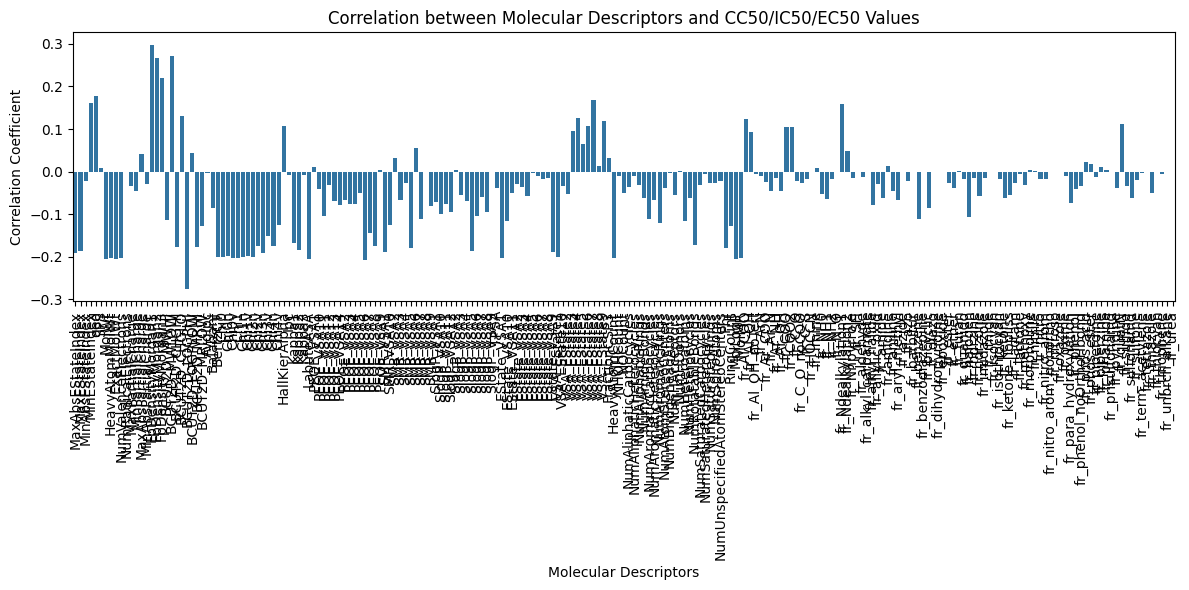

In [ ]:
# generating the Molecular descriptors 
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors

desc_names = [x[0] for x in Descriptors._descList][:100]
calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_names)

def get_rdkit_desc(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    mol_desc = []
    for mol in mols:
        if mol is not None:
            mol = Chem.AddHs(mol)
            descs = calc.CalcDescriptors(mol)
        else:
            descs = [np.nan] * len(desc_names)
        mol_desc.append(descs)
    return mol_desc

mol_desc = get_rdkit_desc(df['Canonical SMILES'])

mol_desc_df = pd.DataFrame(mol_desc, columns=desc_names)
mol_desc_df.to_csv("processed_datasets/molecular_descriptors.csv", index=False)

# calculate correlation between the mol_desc and cytotoxicity values
correlation = mol_desc_df.corrwith(df['CC50/IC50/EC50, mM'].astype(float))
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)
plt.title("Correlation between Molecular Descriptors and CC50/IC50/EC50 Values")
plt.xlabel("Molecular Descriptors")
plt.ylabel("Correlation Coefficient")
plt.tight_layout()
plt.savefig("figures/correlation_molecular_descriptors.png", dpi=300)
plt.show()

/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


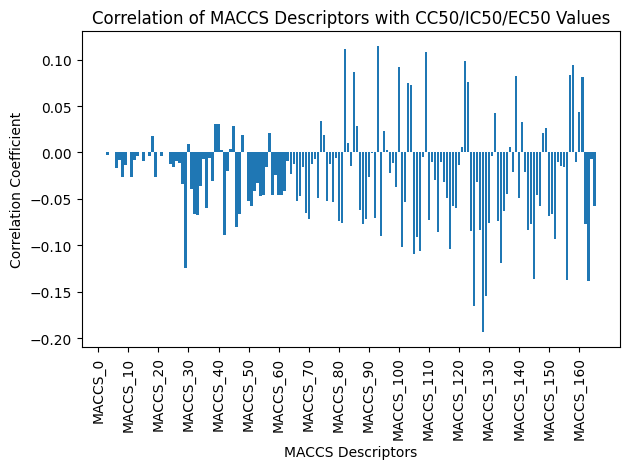

In [ ]:
# calculate the MACCS descriptors
from rdkit.Chem import MACCSkeys

def get_maccs_desc(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    maccs_desc = []
    for mol in mols:
        if mol is not None:
            maccs = MACCSkeys.GenMACCSKeys(mol)
            maccs_desc.append(list(maccs))
        else:
            maccs_desc.append([0] * 167)  # MACCS keys length is 167
    return maccs_desc

maccs_desc = get_maccs_desc(df['Canonical SMILES'])
maccs_desc_df = pd.DataFrame(maccs_desc, columns=[f'MACCS_{i}' for i in range(167)])
maccs_desc_df.to_csv("processed_datasets/maccs_descriptors.csv", index=False)

# find the correlation between the MACCS descriptors and cytotoxicity values
maccs_correlation = maccs_desc_df.corrwith(df['CC50/IC50/EC50, mM'].astype(float))
plt.bar(maccs_correlation.index, maccs_correlation.values)
plt.xticks(ticks=range(0, 167, 10), rotation=90)
plt.title("Correlation of MACCS Descriptors with CC50/IC50/EC50 Values")
plt.xlabel("MACCS Descriptors")
plt.ylabel("Correlation Coefficient")
plt.tight_layout()
plt.savefig("figures/maccs_correlation.png", dpi=300)
plt.show()

In [ ]:
# chemberta 2 embeddings 
from transformers import AutoModelForMaskedLM, AutoTokenizer
from tqdm import tqdm
import torch

def featurize_ChemBERTa(smiles_list, padding=True):
    embeddings_cls = np.zeros((len(smiles_list), 600))
    embeddings_mean = np.zeros((len(smiles_list), 600))
    chemberta = AutoModelForMaskedLM.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
    tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-77M-MTR")

    with torch.no_grad():
        for i, smiles in enumerate(tqdm(smiles_list)):
            encoded_input = tokenizer(smiles, return_tensors="pt",padding=padding,truncation=True)
            model_output = chemberta(**encoded_input)
            
            embedding = model_output[0][::,0,::]
            # normalize the embedding
            embedding = embedding / torch.norm(embedding, p=2, dim=1, keepdim=True)
            embeddings_cls[i] = embedding
            
            
            embedding = torch.mean(model_output[0],1)
            embeddings_mean[i] = embedding
            
    return embeddings_cls, embeddings_mean

# Featurize the SMILES strings using ChemBERTa
smiles_list = df['Canonical SMILES'].tolist()
embeddings_cls, embeddings_mean = featurize_ChemBERTa(smiles_list)

# Convert the embeddings to DataFrames
embeddings_cls_df = pd.DataFrame(embeddings_cls, columns=[f'ChemBERTa_cls_{i}' for i in range(600)])
embeddings_mean_df = pd.DataFrame(embeddings_mean, columns=[f'ChemBERTa_mean_{i}' for i in range(600)])
# concat
embeddings_df = pd.concat([embeddings_cls_df, embeddings_mean_df], axis=1)

embeddings_df.to_csv("processed_datasets/chemberta_embeddings.csv", index=False)


Some weights of RobertaForMaskedLM were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['lm_head.bias', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 3837/3837 [00:11<00:00, 328.60it/s]


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


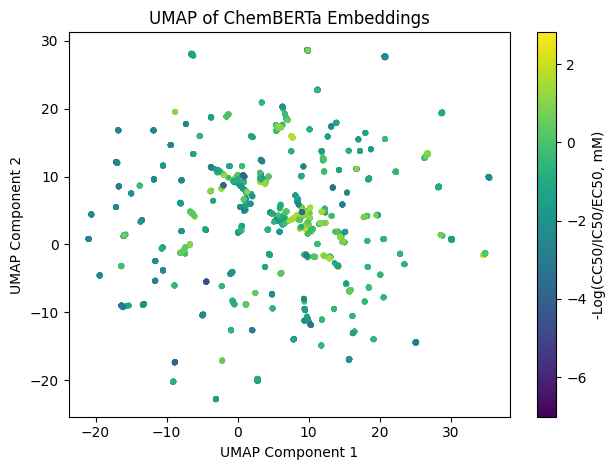

In [ ]:
# run UMAP on the ChemBERTa embeddings
umap_chemberta = UMAP(n_components=2, random_state=42, n_jobs=-1)
umap_result_chemberta = umap_chemberta.fit_transform(embeddings_cls)

log_ct_chemberta = df['CC50/IC50/EC50, mM'].apply(lambda x: np.log10(x) if x > 0 else np.nan)
plt.scatter(umap_result_chemberta[:, 0], umap_result_chemberta[:, 1], c=log_ct_chemberta, cmap='viridis', s=10)
plt.colorbar(label='-Log(CC50/IC50/EC50, mM)')
plt.title("UMAP of ChemBERTa Embeddings")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")  
plt.tight_layout()
plt.savefig("figures/umap_chemberta_embeddings.png", dpi=300)
plt.show()


In [47]:
import torch
from torch import nn
from torch.nn import functional as F
from torch_geometric.nn import TransformerConv, global_mean_pool
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
from rdkit import Chem
from tqdm import tqdm
import pandas as pd
import numpy as np

torch.manual_seed(42)  

def mol_to_graph(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None

    atom_features = []
    for atom in mol.GetAtoms():
        atom_features.append([atom.GetAtomicNum()])  # Use list for shape (N, 1)

    edge_index = []
    edge_attr = []
    for bond in mol.GetBonds():
        start = bond.GetBeginAtomIdx()
        end = bond.GetEndAtomIdx()
        edge_index += [(start, end), (end, start)]
        bond_type = bond.GetBondTypeAsDouble()
        edge_attr += [[bond_type], [bond_type]]  # Shape (E, 1)

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_attr = torch.tensor(edge_attr, dtype=torch.float)
    x = torch.tensor(atom_features, dtype=torch.float)

    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr)

class GraphTransformer(nn.Module):
    def __init__(self, in_channels, out_channels, hidden_channels=64, random_state=42):
        super(GraphTransformer, self).__init__()
        torch.manual_seed(random_state)

        self.conv1 = TransformerConv(in_channels, hidden_channels, edge_dim=1, dropout=0.2)
        self.conv2 = TransformerConv(hidden_channels, out_channels, edge_dim=1, dropout=0.2)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv1(x, edge_index, edge_attr)
        x = F.gelu(x)
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.conv2(x, edge_index, edge_attr)
        x = global_mean_pool(x, data.batch)
        return x


# Build graph data
graph_data = []
for smiles in tqdm(df['Canonical SMILES']):
    graph = mol_to_graph(smiles)
    if graph is not None:
        graph_data.append(graph)
print("Generated graph data\n")

# Batch loading
batch_size = 32
loader = DataLoader(graph_data, batch_size=batch_size, shuffle=False)

# Initialize model
in_channels = 1       # Single feature: atomic number
out_channels = 64     # Final embedding dimension
model = GraphTransformer(in_channels, out_channels)

# Generate embeddings
embeddings = []
model.eval()
with torch.no_grad():
    for batch in tqdm(loader):
        batch = batch.to('cpu')  # or 'cuda' if using GPU
        out = model(batch)
        embeddings.append(out.cpu().numpy())

embeddings = np.concatenate(embeddings, axis=0)
print("Generated graph embeddings\n")

# Save
embeddings_df = pd.DataFrame(embeddings, columns=[f'GT_{i}' for i in range(out_channels)])
embeddings_df.to_csv("processed_datasets/graph_transformer_embeddings.csv", index=False)


100%|██████████| 3837/3837 [00:01<00:00, 3560.27it/s]


Generated graph data



100%|██████████| 120/120 [00:00<00:00, 266.51it/s]


Generated graph embeddings



/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consid

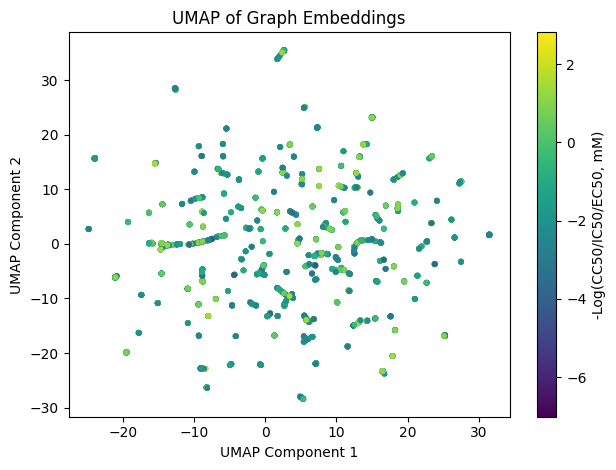

In [ ]:
# run UMAP on the graph embeddings
umap_graph = UMAP(n_components=2, n_jobs=-1)
umap_result_graph = umap_graph.fit_transform(embeddings)

# visualize the UMAP result
log_ct_graph = df['CC50/IC50/EC50, mM'].apply(lambda x: np.log10(x) if x > 0 else np.nan)
plt.scatter(umap_result_graph[:, 0], umap_result_graph[:, 1], c=log_ct_graph, cmap='viridis', s=10)
plt.colorbar(label='-Log(CC50/IC50/EC50, mM)')
plt.title("UMAP of Graph Embeddings")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.tight_layout()
plt.savefig("figures/umap_graph_embeddings.png", dpi=300)
plt.show()

In [ ]:
# save the cytotoxicity values and SMILES strings to a CSV file
df[['Canonical SMILES', 'CC50/IC50/EC50, mM', 'filename']].to_csv("processed_datasets/cytotoxicity_data.csv", index=False)